In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition
from scipy.io import arff
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
print(iris.columns)
X = iris.drop(['species'],axis=1)
X.head()
print(type(X))
X.head()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
df = pd.DataFrame(data=X ,columns=["PC1", "PC2"]) 
df.head()
df["species"] = iris.species
df.head()

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


Text(0.5, 1.0, 'PCA')

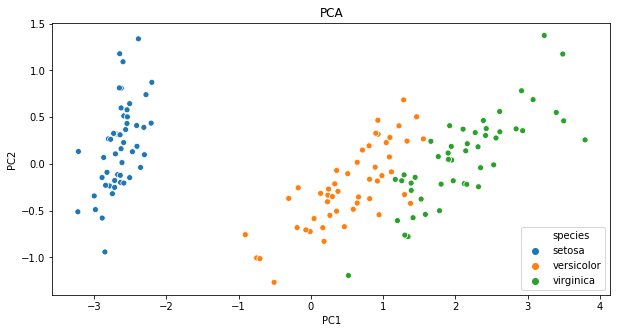

In [5]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['PC1'], y=df['PC2'], hue=df['species'])
plt.title('PCA')

In [32]:
X = iris.drop(['species'],axis=1)
y = iris.species
print(X.shape)
print(type(X))
lda = LinearDiscriminantAnalysis(n_components=2)
z = lda.fit(X, y).transform(X)
df = pd.DataFrame(data=z ,columns=["LD1", "LD2"]) 
df.head()
df["species"] = iris.species
df.head()

(150, 4)
<class 'pandas.core.frame.DataFrame'>


,LD1,LD2,species
0,-8.061800,0.300421,setosa
1,-7.128688,-0.786660,setosa
2,-7.489828,-0.265384,setosa
3,-6.813201,-0.670631,setosa
4,-8.132309,0.514463,setosa


Text(0.5, 1.0, 'LDA')

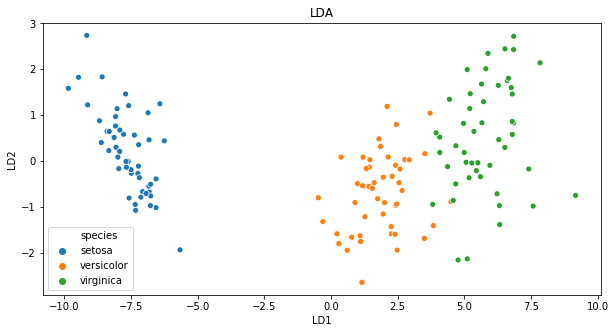

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['LD1'], y=df['LD2'], hue=df['species'])
plt.title('LDA')

In [34]:
data = arff.loadarff('./eeg_data/EEG Eye State.arff')
EEG = pd.DataFrame(data[0])
print(EEG.shape)
print(EEG.columns)
EEG.head()
EEG['eyeDetection'] = EEG['eyeDetection'].apply(pd.to_numeric) 
print(df.dtypes) 

(14980, 15)
Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')
LD1        float64
LD2        float64
species     object
dtype: object


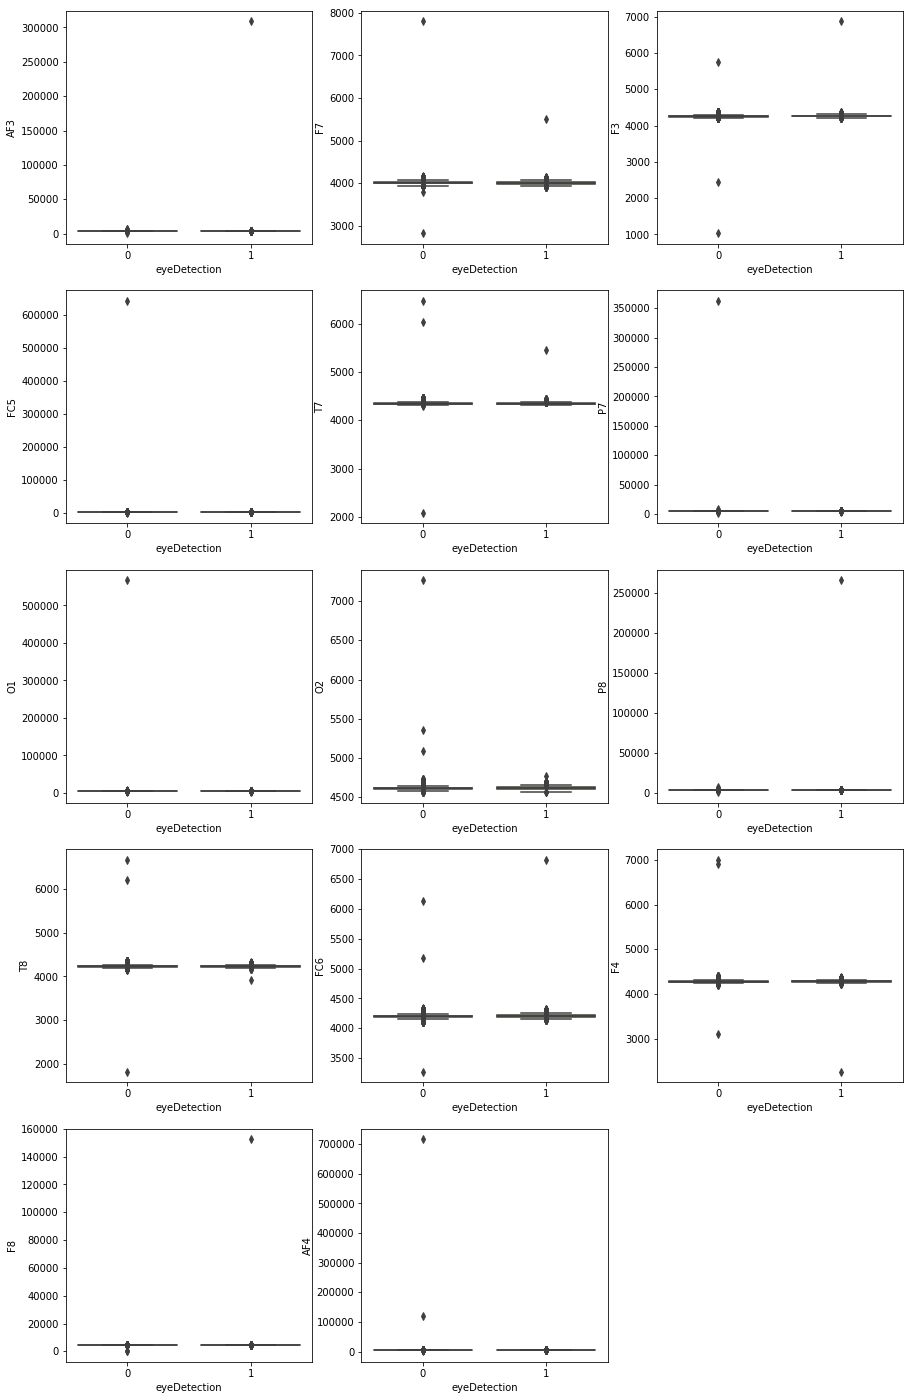

In [9]:
features_to_check = list(EEG.columns)[:-1]
plt.figure(figsize=(15,30))
for i, feature in enumerate(features_to_check):
    plt.subplot(6, 3, i+1)
    sns.boxplot(y=EEG[feature], x=EEG.eyeDetection)

In [10]:
n=0
for i, row in EEG.iterrows():
    unique_id = i
    for elem in row[:-1]:
        if elem > 20000 or elem < 1000:
            EEG.drop(index=unique_id, axis=0, inplace=True)
            n+=1
            break
print("usunięto " + str(n) + " wiersze")

usunięto 4 wiersze


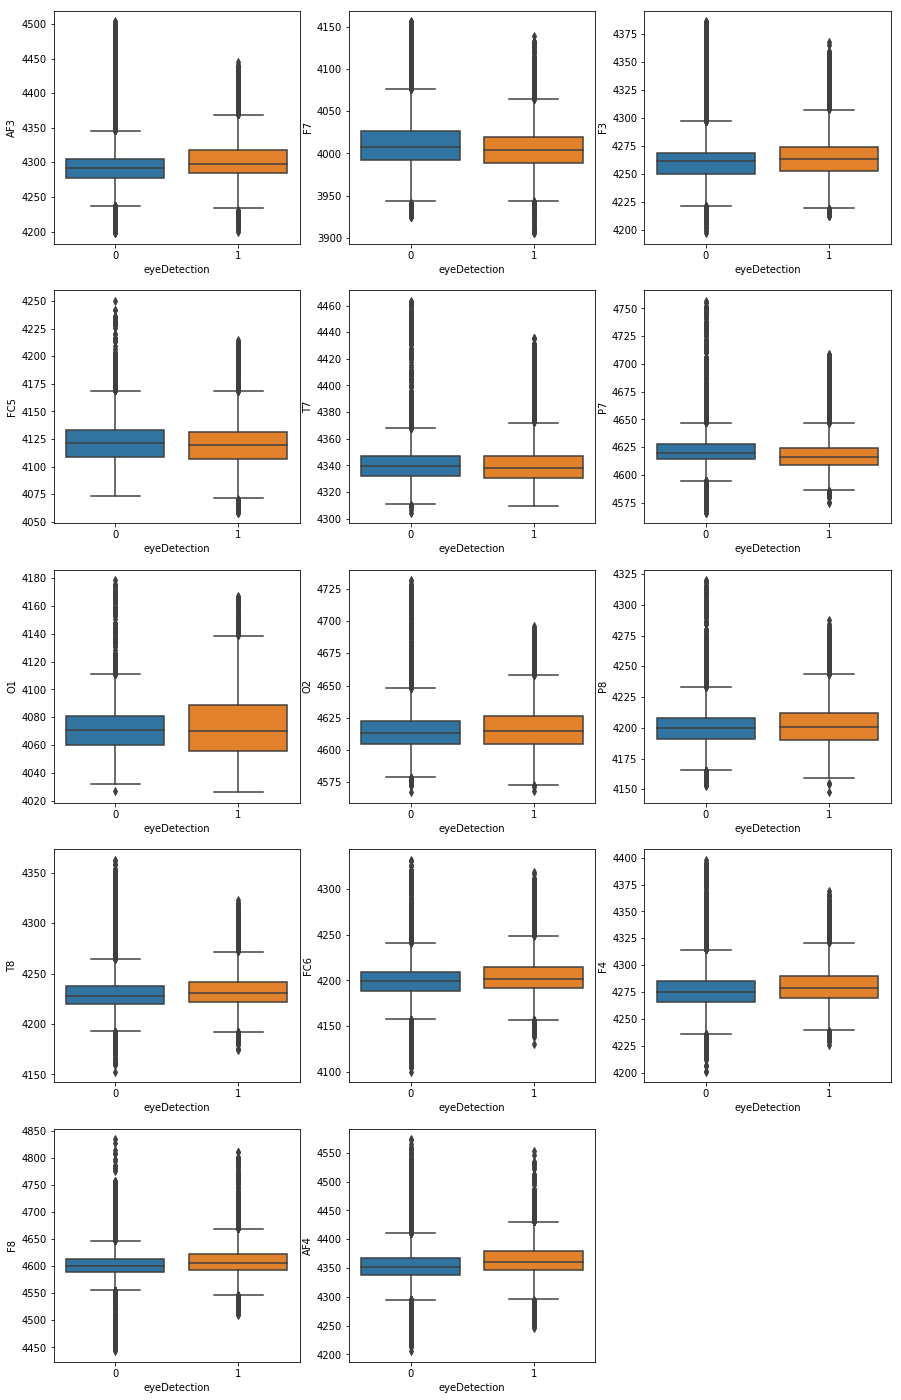

In [11]:
features_to_check = list(EEG.columns)[:-1]
plt.figure(figsize=(15,30))
for i, feature in enumerate(features_to_check):
    plt.subplot(6, 3, i+1)
    sns.boxplot(y=EEG[feature], x=EEG.eyeDetection)

In [12]:
y2 = EEG['eyeDetection']
X2 = EEG.drop(['eyeDetection'],axis=1)
X2.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46


In [17]:
pca = decomposition.PCA(n_components=2)
print(X2.shape)
pca.fit(X2)
Z2 = pca.transform(X2)
df2 = pd.DataFrame(data=Z2 ,columns=["PC1", "PC2"]) 
df2.head()
df2["label"] = y2
df2.head()

(14976, 14)


,PC1,PC2,label
0,61.854080,-0.939352,0.0
1,47.696581,-5.157751,0.0
2,48.932620,-15.918949,0.0
3,62.978883,-9.658018,0.0
4,63.000324,-8.587278,0.0


Text(0.5, 1.0, 'PCA')

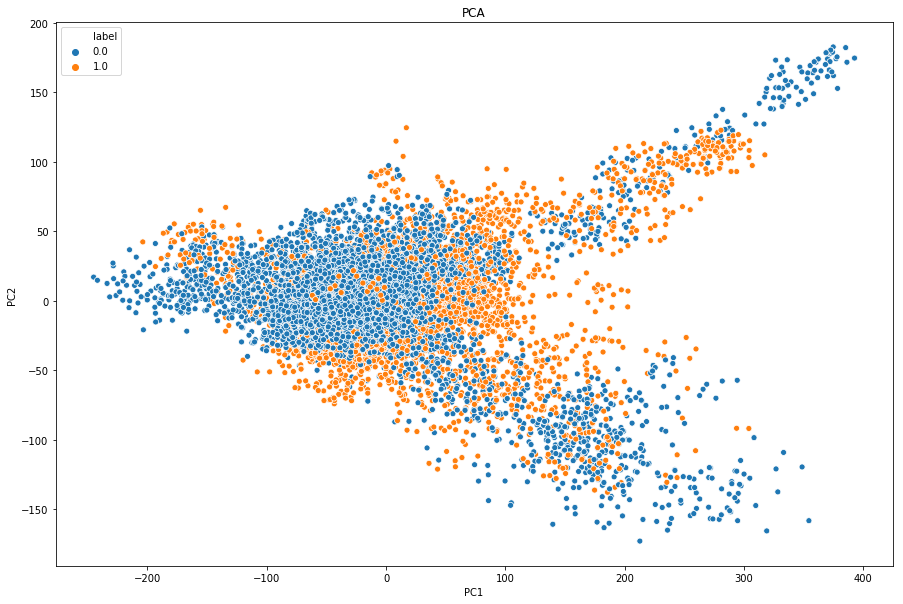

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df2['PC1'], y=df2['PC2'], hue=df2['label'])
plt.title('PCA')

In [45]:
pca = decomposition.PCA(n_components=1)
print(X2.shape)
pca.fit(X2)
Z2 = pca.transform(X2)
df2 = pd.DataFrame(data=Z2 ,columns=["PC1"]) 
df2.head()
df2["label"] = y2
df2.head()

(14976, 14)


,PC1,label
0,61.854080,0.0
1,47.696581,0.0
2,48.932620,0.0
3,62.978883,0.0
4,63.000324,0.0


Text(0.5, 1.0, 'PCA')

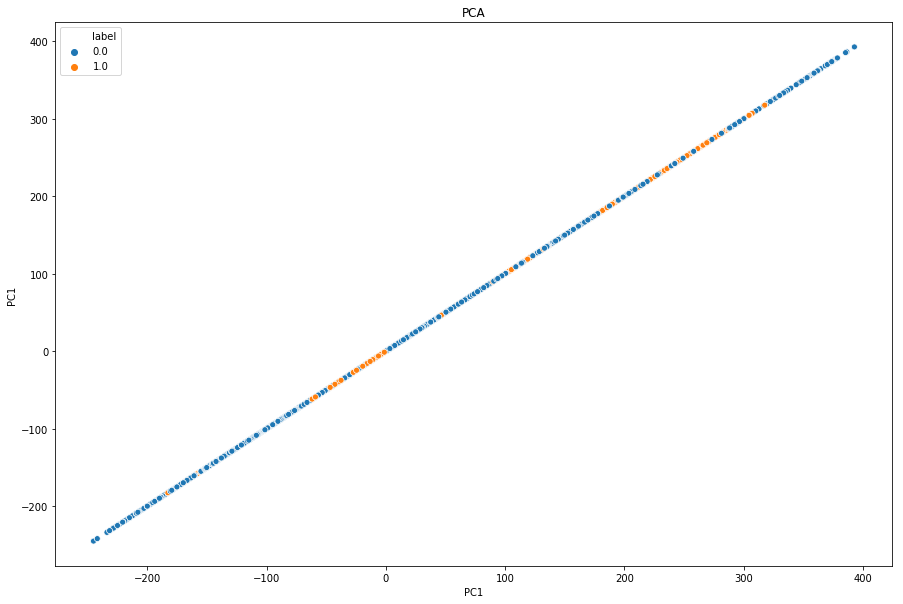

In [46]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df2['PC1'], y=df2['PC1'], hue=df2['label'])
plt.title('PCA')

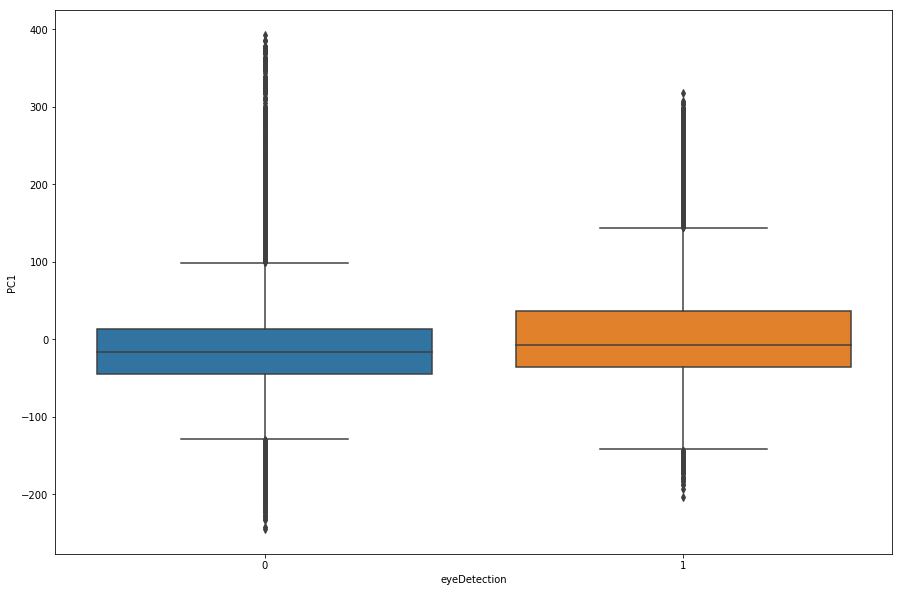

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(y=df2['PC1'], x=EEG.eyeDetection)

In [40]:
print(X2.shape)
print(type(X2))
lda = LinearDiscriminantAnalysis(n_components=2)
#lda = LinearDiscriminantAnalysis(n_components=2)
Z4 = lda.fit_transform(X2,y2)
print(Z4.shape)
df4 = pd.DataFrame(data=Z4 ,columns=["LD1"]) 
df4.head()
df4["label"] = y2
df4.head()

(14976, 14)
<class 'pandas.core.frame.DataFrame'>
(14976, 1)


,LD1,label
0,3.537775,0.0
1,2.999826,0.0
2,2.787703,0.0
3,3.358469,0.0
4,3.287771,0.0


Text(0.5, 1.0, 'LDA')

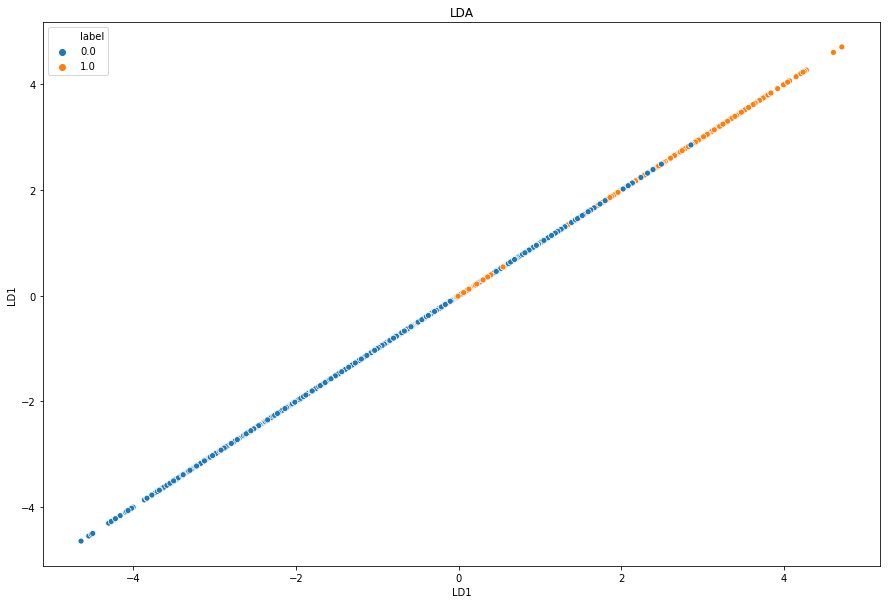

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df4['LD1'], y=df4['LD1'], hue=df4['label'])
plt.title('LDA')

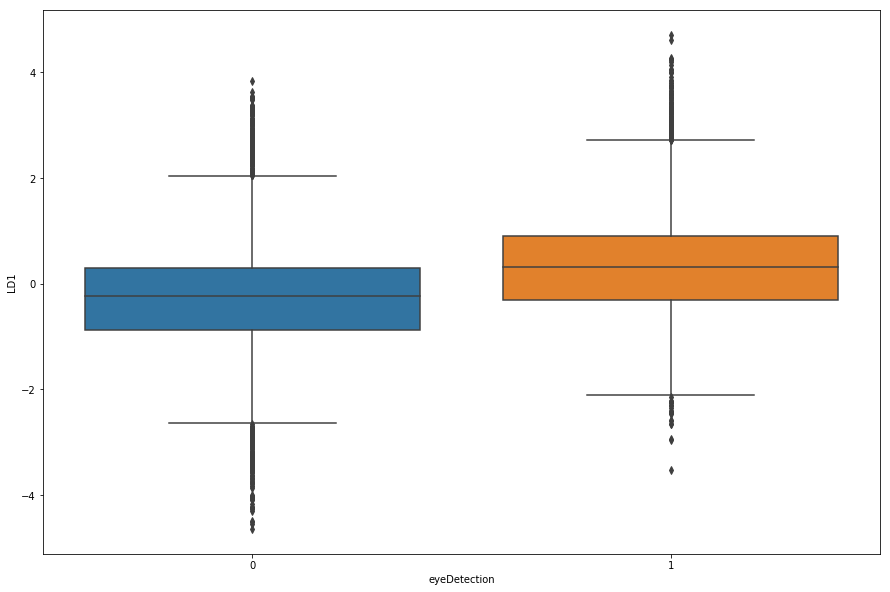

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(y=df4['LD1'], x=EEG.eyeDetection)